In this data analysis, we will analyse competitor data from the OpenPowerlifting Database.

It will be split into Part 1 and Part 2.

In Part 1 we will see if we can predict how well a competitor will do before they even arrive on the day of competition, and if so how.This is done by checking for any relationships between possible performance variables (our independent variables - TotalKg, Wilks, IPFPoints - checked one at a time), and certain dependent variables (Age, BodyweightKg, Sex) which are true of the competitor before the event.

In Part 2 we will see if we can predict how well a competitor will do during the competition based on their first lift (squat) and then second lift (bench press), and if so how. Thus will be done by checking for relationships between the same performance variables, again one at a time, and our two dependent variables (the first lift - squat - and the second lift - bench press).

Before we get started we will prepare the dataframe

In [222]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm
from scipy.stats import pearsonr
import numpy as np
from sklearn.metrics import r2_score

In [122]:
df = pd.read_csv(r"C:\Users\tom\Documents\Other\openpowerlifting.csv", usecols=[1, 4, 5, 6, 7, 8, 13, 18, 23, 24, 26, 29], nrows=1000000)

Now we clean the data. Some competitors did not complete all three lifts, so their TotalKg will be severely lower than it should. To consider only those who completed all three lifts (squat, bench press and deadlift), we simply remove any rows with nan's.

In [123]:
print(df.dtypes)

Sex                 object
Age                float64
AgeClass            object
Division            object
BodyweightKg       float64
WeightClassKg       object
Best3SquatKg       float64
Best3BenchKg       float64
Best3DeadliftKg    float64
TotalKg            float64
Wilks              float64
IPFPoints          float64
dtype: object


In [124]:
df = df.dropna(axis=0, how='any')

Part 1

We have cleaned the data. Now we will visualise the data in various ways to better understand the dataset, although of course no conclusions will be derived from these visualisations alone.

<AxesSubplot:xlabel='BodyweightKg', ylabel='TotalKg'>

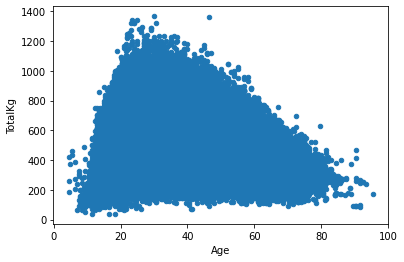

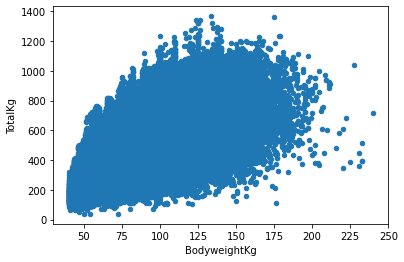

In [125]:
df.plot(kind='scatter',x='Age',y='TotalKg')
df.plot(kind='scatter',x='BodyweightKg',y='TotalKg')

As can be seen, there appears to perhaps be some vague pattern (a possible linear relationship as it seems), but hardly. Let's instead restrict our data to one age class, and then observe how bodyweight now relates to TotalKg.

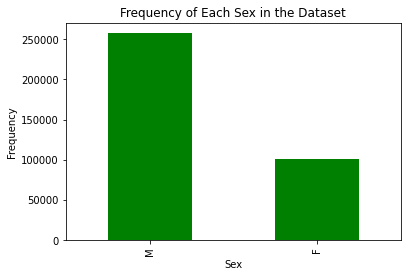

M    257498
F    100825
Name: Sex, dtype: int64


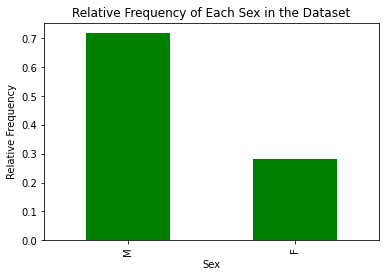

M    0.71862
F    0.28138
Name: Sex, dtype: float64


In [126]:
df['Sex'].value_counts().plot.bar(color='green', title="Frequency of Each Sex in the Dataset", xlabel="Sex", ylabel="Frequency")
plt.show()
print(df['Sex'].value_counts())
df['Sex'].value_counts(normalize=True).plot.bar(color='green', title="Relative Frequency of Each Sex in the Dataset", xlabel="Sex", ylabel="Relative Frequency")
plt.show()
print(df['Sex'].value_counts(normalize = True))


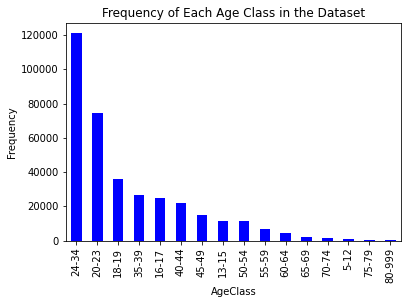

24-34     121002
20-23      74470
18-19      36045
35-39      26582
16-17      25013
40-44      21838
45-49      15009
13-15      11430
50-54      11169
55-59       6550
60-64       4184
65-69       2330
70-74       1356
5-12         664
75-79        519
80-999       162
Name: AgeClass, dtype: int64


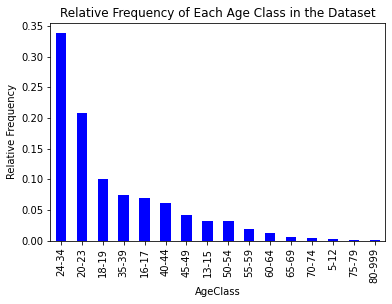

24-34     0.337690
20-23     0.207829
18-19     0.100594
35-39     0.074184
16-17     0.069806
40-44     0.060945
45-49     0.041887
13-15     0.031899
50-54     0.031170
55-59     0.018280
60-64     0.011677
65-69     0.006503
70-74     0.003784
5-12      0.001853
75-79     0.001448
80-999    0.000452
Name: AgeClass, dtype: float64


In [127]:
df['AgeClass'].value_counts().plot.bar(color='blue', title="Frequency of Each Age Class in the Dataset", xlabel="AgeClass", ylabel="Frequency")
plt.show()
print(df['AgeClass'].value_counts())
df['AgeClass'].value_counts(normalize=True).plot.bar(color='blue', title="Relative Frequency of Each Age Class in the Dataset", xlabel="AgeClass", ylabel="Relative Frequency")
plt.show()
print(df['AgeClass'].value_counts(normalize=True))

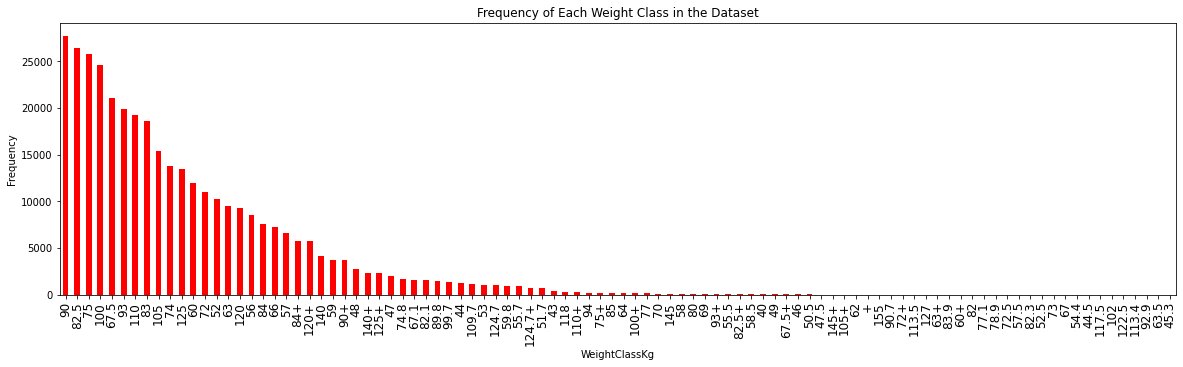

90       27741
82.5     26398
75       25744
100      24587
67.5     21062
         ...  
122.5        1
113.4        1
92.9         1
63.5         1
45.3         1
Name: WeightClassKg, Length: 96, dtype: int64


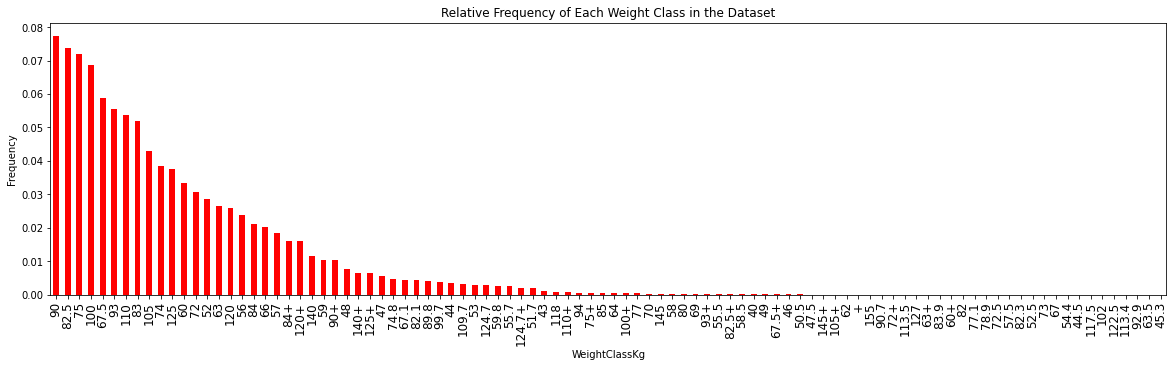

90       0.077419
82.5     0.073671
75       0.071846
100      0.068617
67.5     0.058779
           ...   
122.5    0.000003
113.4    0.000003
92.9     0.000003
63.5     0.000003
45.3     0.000003
Name: WeightClassKg, Length: 96, dtype: float64


In [128]:
df['WeightClassKg'].value_counts().plot.bar(color='red', title="Frequency of Each Weight Class in the Dataset", xlabel="WeightClassKg", ylabel="Frequency", figsize=[20,5])
plt.tick_params(axis='x', labelsize=12)
plt.show()
print(df['WeightClassKg'].value_counts())
df['WeightClassKg'].value_counts(normalize=True).plot.bar(color='red', title="Relative Frequency of Each Weight Class in the Dataset", xlabel="WeightClassKg", ylabel="Frequency", figsize=[20,5])
plt.tick_params(axis='x', labelsize=12)
plt.show()
print(df['WeightClassKg'].value_counts(normalize=True))

array([[<AxesSubplot:title={'center':'BodyweightKg'}>]], dtype=object)

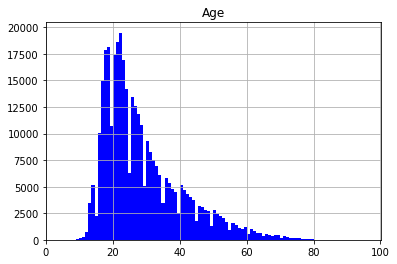

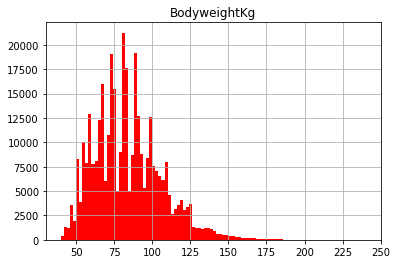

In [129]:
df.hist(column='Age', bins=100, color='blue')
df.hist(column='BodyweightKg', bins=100, color='red')

Note: weight is likely "spikier" as competitors will want to make their weight as close to the upper boundary of that weight class as possible.

In [130]:
age_adjusted_df_18 = df[df['AgeClass'].str.contains('18-19')]
age_adjusted_df_35 = df[df['AgeClass'].str.contains('35-39')]
age_adjusted_df_55 = df[df['AgeClass'].str.contains('55-59')]
age_adjusted_df_75 = df[df['AgeClass'].str.contains('75-79')]

<AxesSubplot:xlabel='BodyweightKg', ylabel='TotalKg'>

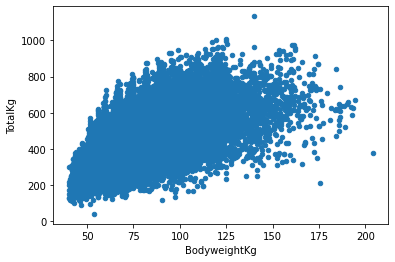

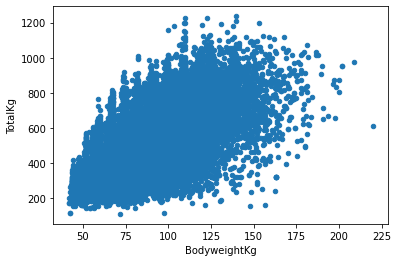

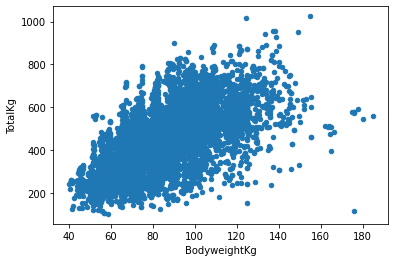

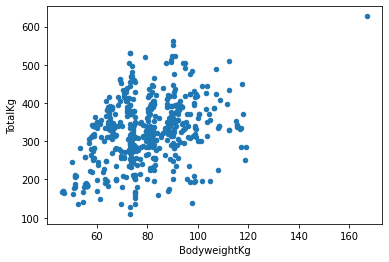

In [131]:
age_adjusted_df_18.plot(kind='scatter',x='BodyweightKg',y='TotalKg')
age_adjusted_df_35.plot(kind='scatter',x='BodyweightKg',y='TotalKg')
age_adjusted_df_55.plot(kind='scatter',x='BodyweightKg',y='TotalKg')
age_adjusted_df_75.plot(kind='scatter',x='BodyweightKg',y='TotalKg')

Similar results, but notice how this vague possible linear relationship we observed is going on in all of these age classes. 

Now let's sort see the relationship between age and TotalKg within certain bodyweight classes.

In [132]:
weight_adjusted_df_63 = df[df['WeightClassKg'].str.contains('63')]
weight_adjusted_df_84 = df[df['WeightClassKg'].str.contains('84')]
weight_adjusted_df_74 = df[df['WeightClassKg'].str.contains('74')]
weight_adjusted_df_93 = df[df['WeightClassKg'].str.contains('93')]

<AxesSubplot:xlabel='Age', ylabel='TotalKg'>

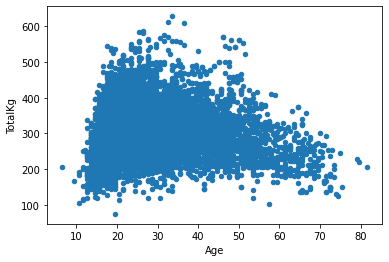

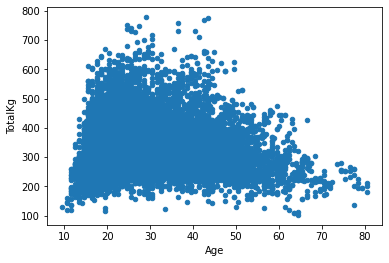

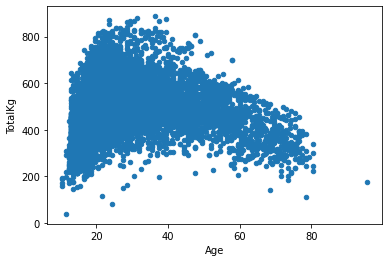

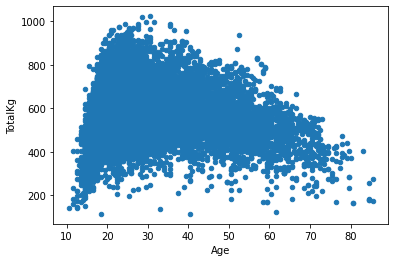

In [133]:
weight_adjusted_df_63.plot(kind='scatter',x='Age',y='TotalKg')
weight_adjusted_df_84.plot(kind='scatter',x='Age',y='TotalKg')
weight_adjusted_df_74.plot(kind='scatter',x='Age',y='TotalKg')
weight_adjusted_df_93.plot(kind='scatter',x='Age',y='TotalKg')

Again, there appears to be some sort of vague relationship, however interestingly, if such a relationship exists, we would from these visualisations expect it to be non-linear. This is intuitive as a child will likely be weaker than someone in their twenties (initially age and performance increase together) but of course as you age you eventually become weaker again.

One more interesting point is the Wilks score is meant to be a weight-adjusted scoring system for the top powerlifters (it is not concerned with those who don't perform best in their weight class). So, it is interesting to see whether there actually is no correlation between bodyweight and Wilks score for all tiers of performance.

<AxesSubplot:title={'center':'Relationship Between Age and Wilks Score'}, xlabel='Age', ylabel='Wilks'>

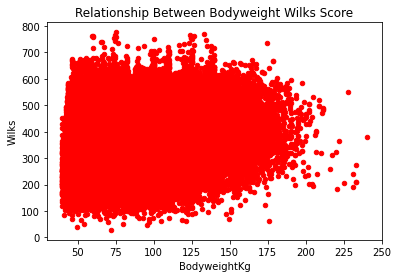

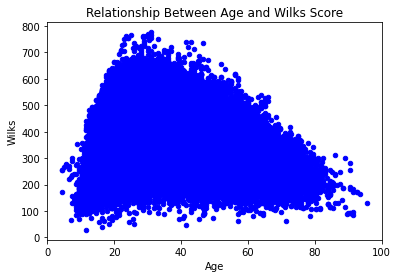

In [134]:
df.plot(kind='scatter', x='BodyweightKg', y='Wilks', color='red', title="Relationship Between Bodyweight Wilks Score")
df.plot(kind='scatter', x='Age', y='Wilks', color='blue', title="Relationship Between Age and Wilks Score")

Our final possible measure of the overall competitor's performance is their accumulated IPF Points. 

<AxesSubplot:title={'center':'Relationship Between Age and IPF Points'}, xlabel='Age', ylabel='IPFPoints'>

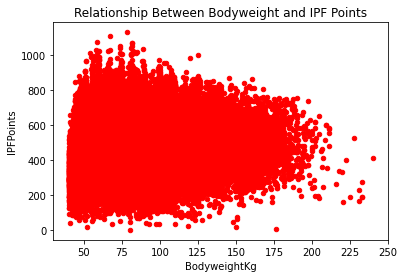

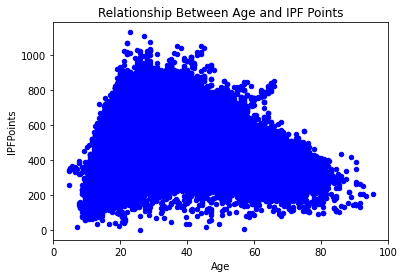

In [135]:
df.plot(kind='scatter', x='BodyweightKg', y='IPFPoints', color='red', title="Relationship Between Bodyweight and IPF Points")
df.plot(kind='scatter', x='Age', y='IPFPoints', color='blue', title="Relationship Between Age and IPF Points")

Next we want to sort out our training and testing data. However, if we just took the top 80% of rows for training, this would not be an unbiased sample of the population of results. So we will firstly randomly reorganise the rows, and then take the first 80% for training data.

In [136]:
from sklearn.utils import shuffle

In [137]:
df = shuffle(df)

In [138]:
row_split = int(df.shape[0] * 0.8)
trainingdf = df.iloc[0:row_split]
testingdf = df.iloc[row_split:]

In [139]:
print(testingdf)

       Sex   Age AgeClass              Division  BodyweightKg WeightClassKg  \
36023    M  14.5    13-15                  Open         43.40            52   
639038   M  37.0    35-39  Pro Submasters 33-39        131.54           140   
685588   M  40.0    40-44                 MR-M1         72.50            74   
861246   M  28.0    24-34                  Open        110.00           110   
959898   F  23.5    24-34                  Open         42.30            44   
...     ..   ...      ...                   ...           ...           ...   
943541   M  21.5    20-23                  Open         56.00            56   
586397   M  59.5    55-59         Masters 60-69         90.30            93   
746349   M  39.0    35-39                  MR-O         73.70            74   
682329   M  32.0    24-34                  MR-O         90.90            93   
981609   M  28.5    24-34                  Open         85.70            90   

        Best3SquatKg  Best3BenchKg  Best3DeadliftKg

Now we will test for correlations between "performance" and age, bodyweight and sex, by producing a Pearson Correlation Coefficient matrix of the dataframe, and display a heatmap of the correlation matrix for added clarity. This will help us with making educated guesses as to the nature of the relationships between our numerical indepedent variables (age and bodyweight) and our perfroamce-related dependent variables.

In [140]:
corr = df.corr()
df.corr()

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,IPFPoints
Age,1.000000,0.137401,-0.001003,0.069681,0.025918,0.028757,-0.034975,-0.023624
BodyweightKg,0.137401,1.000000,0.623359,0.647597,0.628431,0.654822,0.177868,0.077962
Best3SquatKg,-0.001003,0.623359,1.000000,0.904261,0.905869,0.975892,0.796911,0.608321
Best3BenchKg,0.069681,0.647597,0.904261,1.000000,0.871405,0.953309,0.712281,0.516603
Best3DeadliftKg,0.025918,0.628431,0.905869,0.871405,1.000000,0.961831,0.729675,0.606814
TotalKg,0.028757,0.654822,0.975892,0.953309,0.961831,1.000000,0.778014,0.603496
Wilks,-0.034975,0.177868,0.796911,0.712281,0.729675,0.778014,1.000000,0.874037
IPFPoints,-0.023624,0.077962,0.608321,0.516603,0.606814,0.603496,0.874037,1.000000


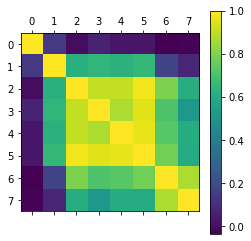

In [141]:
figure1 = plt.matshow(corr)
plt.colorbar(figure1) 
plt.show()

In [142]:
spear_corr = df.corr(method='spearman')
df.corr(method='spearman')

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,IPFPoints
Age,1.000000,0.196270,0.087650,0.157197,0.127269,0.125517,0.091544,0.135560
BodyweightKg,0.196270,1.000000,0.645801,0.674395,0.662492,0.679683,0.180265,0.097649
Best3SquatKg,0.087650,0.645801,1.000000,0.910364,0.920172,0.977455,0.780939,0.600622
Best3BenchKg,0.157197,0.674395,0.910364,1.000000,0.893537,0.957877,0.699954,0.520171
Best3DeadliftKg,0.127269,0.662492,0.920172,0.893537,1.000000,0.968469,0.725048,0.594757
TotalKg,0.125517,0.679683,0.977455,0.957877,0.968469,1.000000,0.763966,0.595260
Wilks,0.091544,0.180265,0.780939,0.699954,0.725048,0.763966,1.000000,0.879955
IPFPoints,0.135560,0.097649,0.600622,0.520171,0.594757,0.595260,0.879955,1.000000


There is clearly a good chance that the relationship between bodyweight and total weight is linear, since the PCC and the Spearman's rank correlation coefficient of the two are very similar, and the PCC is 0.65 which shows a moderately strong positive linear correlation (given the large sample size). So we should try to establish an estimate for their linear relationship.

Age has a much higher SRCC than PCC with total weight, suggesting there could be some non-linear relationship. Recalling the scatter graph from earlier, the top performers (in TotalKg) in age seemed to follow an n-shape curve, so it would be reasonable to try to relate the two through a quadratic equation.

We can then test each of these estimated relationships, and then go on to regress the quadratic relating age to weight lifted, and bodyweight with total weight lifted to see if we can even better model total weight lifted. We can run some brief tests to see if the regressive techniques have worked like they should, and see how volatile TotalKg is from these estimated relationships. But the real test will be later with the testing data.

Lets train the first model (linear regression between bodyweight and totalkg).

In [234]:
BodyweightTotalweight = sm.ols(formula="TotalKg ~ BodyweightKg", data=trainingdf).fit()
print(BodyweightTotalweight.params)

Intercept       71.471393
BodyweightKg     5.148538
dtype: float64


In [245]:
temp_df5 = trainingdf.copy()
temp_df5['Cost Function'] = abs(BodyweightTotalweight.params[0] + BodyweightTotalweight.params[1]*trainingdf['BodyweightKg'] - trainingdf['TotalKg'])

In [255]:
temp_df6 = temp_df5['Cost Function']
print(temp_df6.mean())
print(temp_df6.std())
print(r2_score(trainingdf['TotalKg'], (BodyweightTotalweight.params[0]) + BodyweightTotalweight.params[1]*trainingdf['BodyweightKg']))

104.6081307124814
80.96421039350732
0.4282471744177615


This first model has a good r-squared score considering the visible high volatility of TotalKg as bodyweight varies. The mean of the absolute error is not too large given how volatile the data is (evident in the scatter graphs). Of course, we will confirm the validity of this relationship with the testing data.

Now let's train the second model (quadratic regression on age and totalkg).

In [217]:
AgeTotalWeight = np.polyfit(x=trainingdf['Age'], y=trainingdf['TotalKg'], deg=2)
print(AgeTotalWeight)

[ -0.23877312  17.7372017  225.10589828]


In [247]:
temp_df7 = trainingdf.copy()
temp_df7['Cost Function'] = abs((AgeTotalWeight[0]*trainingdf['Age']*trainingdf['Age']) + (AgeTotalWeight[1]*trainingdf['Age']) + AgeTotalWeight[2] - trainingdf['TotalKg'])

In [248]:
temp_df8 = temp_df7['Cost Function']
print(temp_df8.mean())
print(temp_df8.std())

138.25887228567115
97.14281100387596


Note that it is bad practice to calculate r-squared to test validity of a non-linear relationship.

Finally, let's train the third model (multiple linear regression of the first two models with totalkg).

So we have linearly regressed bodyweight with weight lifted, and quadratically regressed age with weight lifted. Both models have yielded a relatively low mean given the high volatility in TotalKg when compared to either. This may prove problematic when applying to the test data. Let's see if a linear combination of these two models offers a better standard deviation.

In [190]:
temp_df2 = trainingdf.copy()
temp_df2['AgeTotalWeight'] = (AgeTotalWeight[0]*trainingdf['Age']*trainingdf['Age']) + (AgeTotalWeight[1]*trainingdf['Age']) + AgeTotalWeight[2]
print(temp_df2)

       Sex   Age AgeClass          Division  BodyweightKg WeightClassKg  \
933895   F  40.0    40-44         Masters 1         79.00            84   
673143   F  19.5    20-23             FR-Jr         58.60            63   
787614   M  20.5    20-23              Open         73.80            75   
58127    M  22.5    20-23              Open         91.98            93   
685011   M  43.0    40-44              MR-O         92.80            93   
...     ..   ...      ...               ...           ...           ...   
775975   F  23.5    24-34              Open         59.37            63   
698678   F  41.5    40-44            FR-M1a         55.80            56   
707032   F  60.5    60-64              F-M3         55.90            57   
825884   F  36.0    35-39  Submasters 35-39         54.00            56   
826416   M  25.0    24-34              Open         96.60           100   

        Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg   Wilks  \
933895         145.0       

In [194]:
AgeWeightTotalWeight = sm.ols(formula="TotalKg ~ AgeTotalWeight + BodyweightKg", data=temp_df2).fit()
print(AgeWeightTotalWeight.params)

Intercept        -206.771134
AgeTotalWeight      0.585631
BodyweightKg        4.944868
dtype: float64


In [249]:
temp_df3 = temp_df2.copy()
temp_df3['Cost Function'] = abs(AgeWeightTotalWeight.params[0] + AgeWeightTotalWeight.params[1]*temp_df2['AgeTotalWeight'] + AgeWeightTotalWeight.params[2]*temp_df2['BodyweightKg'] - temp_df2['TotalKg'])
print(temp_df3)

       Sex   Age AgeClass          Division  BodyweightKg WeightClassKg  \
933895   F  40.0    40-44         Masters 1         79.00            84   
673143   F  19.5    20-23             FR-Jr         58.60            63   
787614   M  20.5    20-23              Open         73.80            75   
58127    M  22.5    20-23              Open         91.98            93   
685011   M  43.0    40-44              MR-O         92.80            93   
...     ..   ...      ...               ...           ...           ...   
775975   F  23.5    24-34              Open         59.37            63   
698678   F  41.5    40-44            FR-M1a         55.80            56   
707032   F  60.5    60-64              F-M3         55.90            57   
825884   F  36.0    35-39  Submasters 35-39         54.00            56   
826416   M  25.0    24-34              Open         96.60           100   

        Best3SquatKg  Best3BenchKg  Best3DeadliftKg  TotalKg   Wilks  \
933895         145.0       

In [250]:
temp_df4 = temp_df3[['Cost Function']]
print(temp_df4.mean())
print(temp_df4.std())

Cost Function    102.6159
dtype: float64
Cost Function    79.276667
dtype: float64


This is not an imporvement on the cost function of the first model, but is an improvement on the second model, from what we have seen so far. All three models have a high standard deviation in error, but this is expected from the visualisations, and so all cost functions have a relatively low mean. 

Now we can test all three models using the testing data.

It is more straightforward to test the first model (bodyweight - weight lifted). Since it is linear, we just need to calculate the r-squared relative to the test data.

In [273]:
testtemp_df1 = testingdf.copy()
testtemp_df1['Cost Function'] = abs(BodyweightTotalweight.params[0] + (BodyweightTotalweight.params[1] * testingdf['BodyweightKg']) - testingdf['TotalKg'])
testtemp_df2 = testtemp_df1['Cost Function']
print(testtemp_df2.mean())
print(testtemp_df2.std())
print(r2_score(testingdf['TotalKg'], BodyweightTotalweight.params[0] + (BodyweightTotalweight.params[1]*testingdf['BodyweightKg'])))

104.40168763699837
81.1250252375322
0.43095894714335037


This is approximately the same as the r-squared value using the training data. Given how high the variance is already in the TotalKg when compared to bodyweight, and how large the sample is, this is a largely good r-squared value, and evidence that the relationship follows this somewhat linear equation. The mean and std are also approximately the same. So we can conclude that the first model highlights a key general relationship (that is either linear or close to linear) between bodyweight and weight lifted, but holds generally weak predictive abilities due to the high volatility of the weight lifted. 

In [276]:
testtemp_df3 = testingdf.copy()
testtemp_df3['Cost Function'] = abs((AgeTotalWeight[0]*testingdf['Age']*testingdf['Age']) + (AgeTotalWeight[1]*testingdf['Age']) + AgeTotalWeight[2] - testingdf['TotalKg'])
testtemp_df4 = testtemp_df3['Cost Function']
print(testtemp_df4.mean())
print(testtemp_df4.std())

138.5765966727196
97.20763095071293


Similarly to the first model, this has a good mean absolute error given the high volatility. So again we can see that there is evidence of a general relationship between age and weight lifted, that is either quadratic or close to quadratic. Again, due to the high volatility, its predictive powers are weak yet can give a rough idea.

In [284]:
testtemp_df5 = testingdf.copy()
testtemp_df5['Cost Function'] = abs(AgeWeightTotalWeight.params[0] + (AgeWeightTotalWeight.params[2]*testingdf['BodyweightKg']) + (AgeWeightTotalWeight.params[1]*(AgeTotalWeight[0]*testingdf['Age']*testingdf['Age']) + (AgeTotalWeight[1]*testingdf['Age']) + AgeTotalWeight[2]))
testtemp_df6 = testtemp_df5['Cost Function']
print(testtemp_df6.mean())
print(testtemp_df6.std())

810.4611611987923
157.08393557234558


The third model was clearly overfitted as the mean absolute error is extremely large. Hence it is not a good predictive model, nor does it provide an insight into the relationship of how age and bodyweight together relate to weight lifted. We would likely need more sophisticated supervised learning techniques to derive a better model combining both age and bodyweight as independent variables, but this is out of the scope of this investigation.